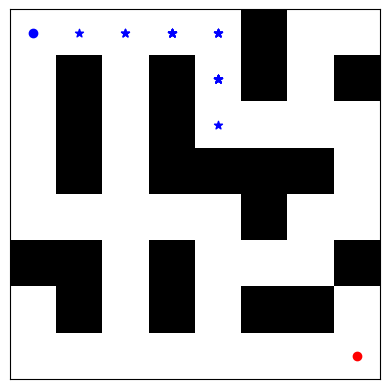

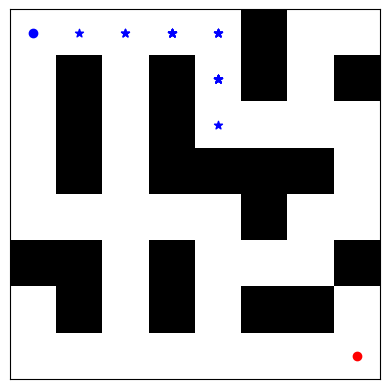

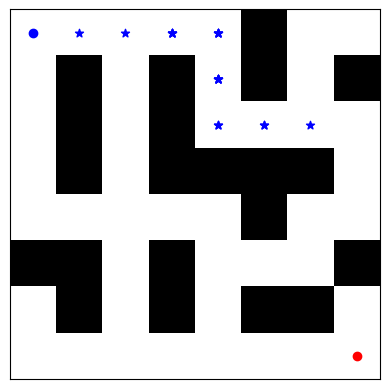

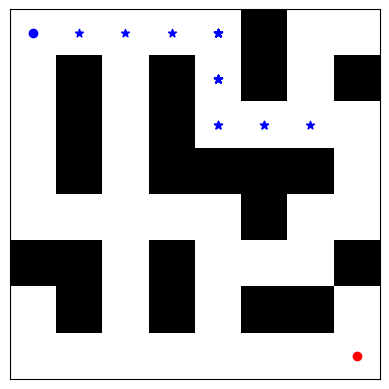

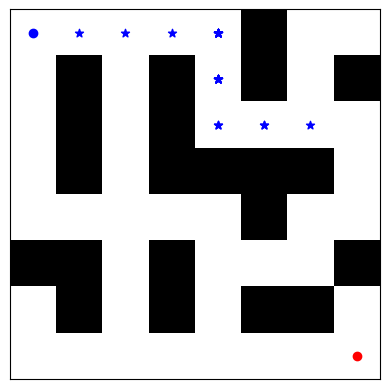

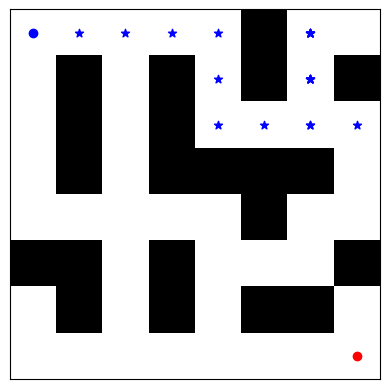

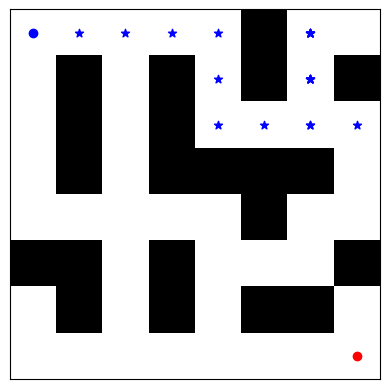

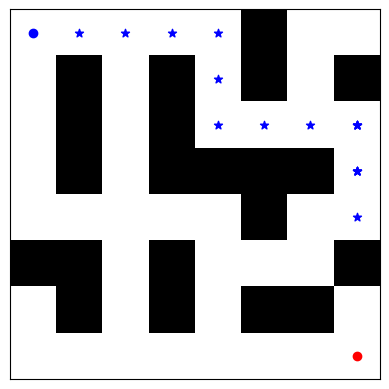

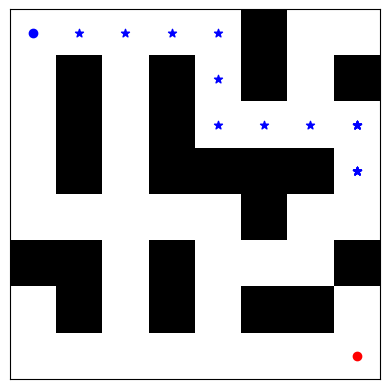

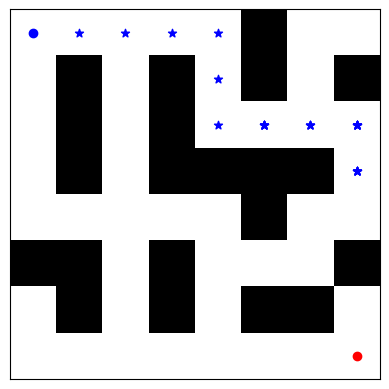

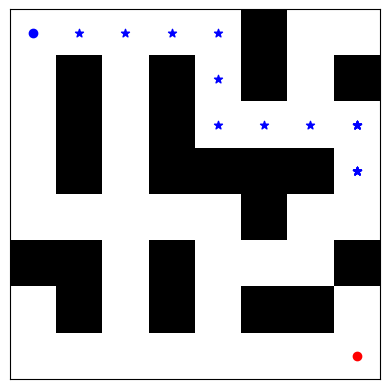

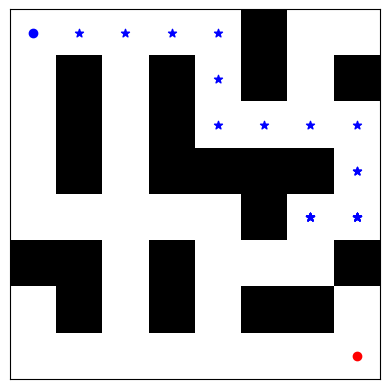

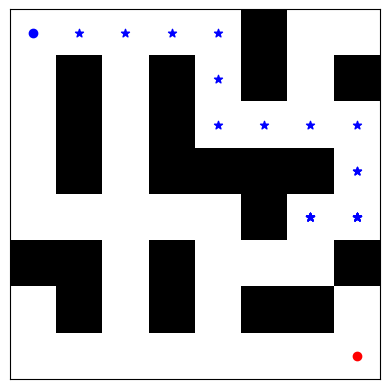

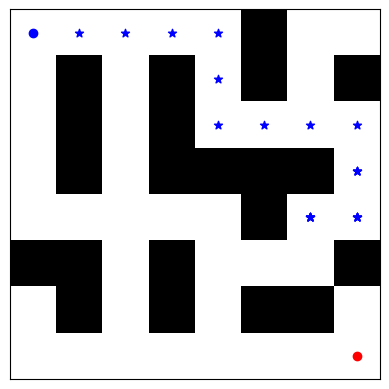

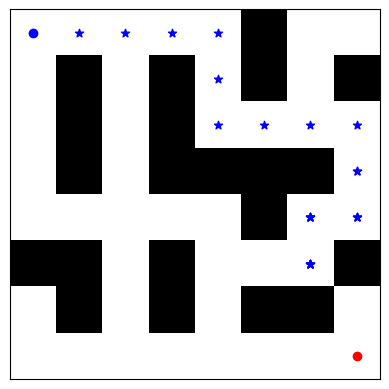

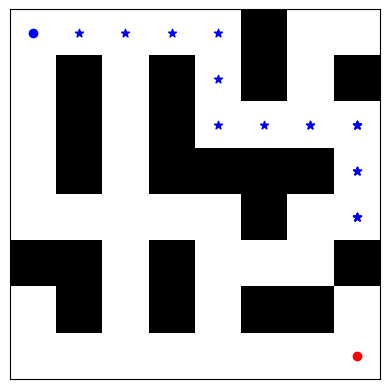

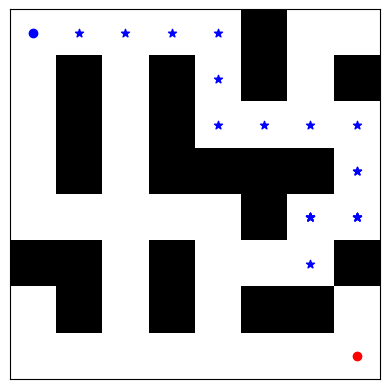

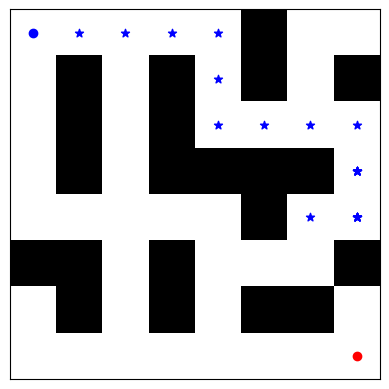

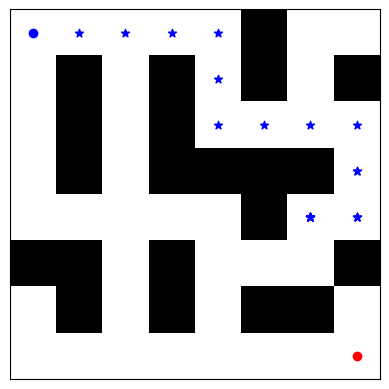

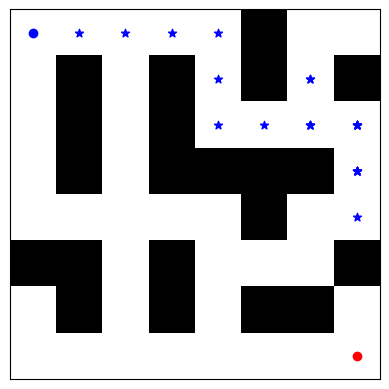

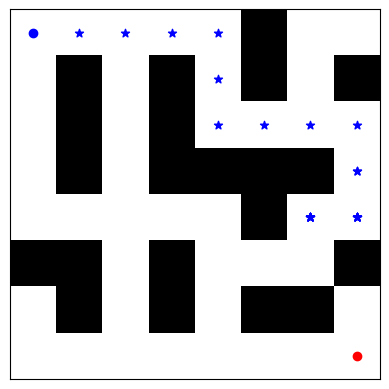

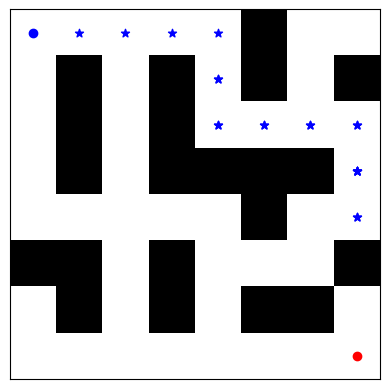

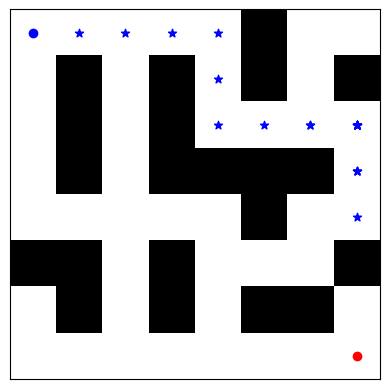

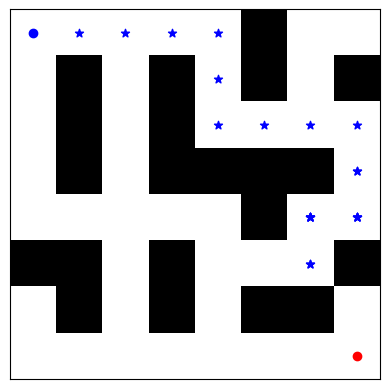

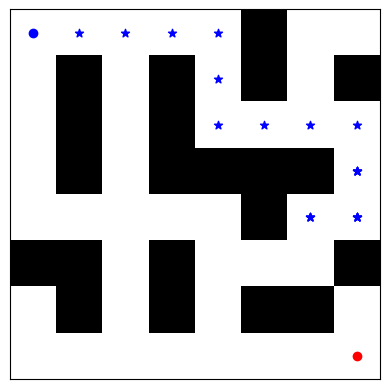

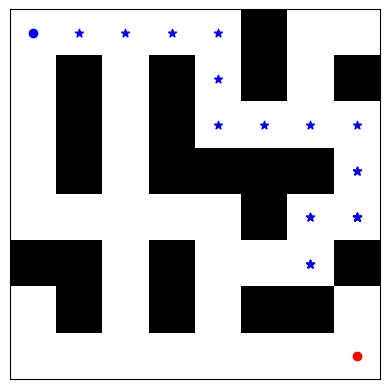

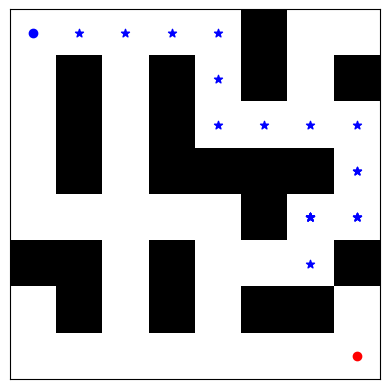

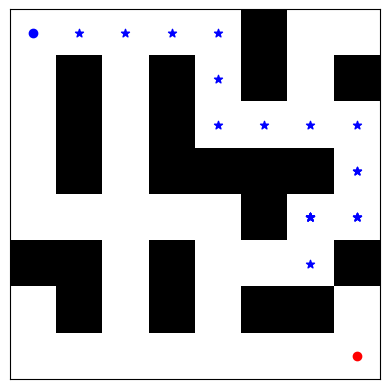

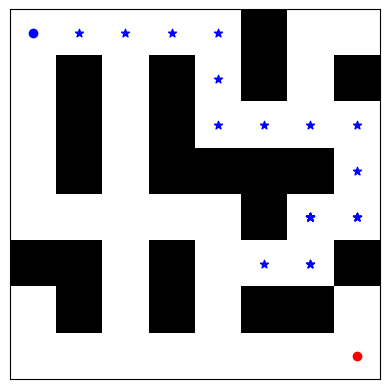

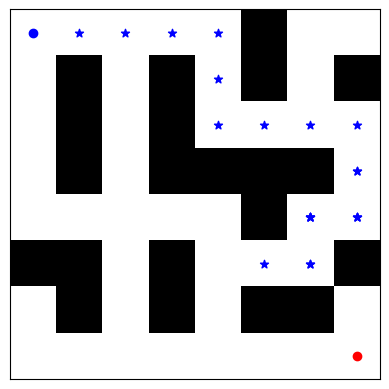

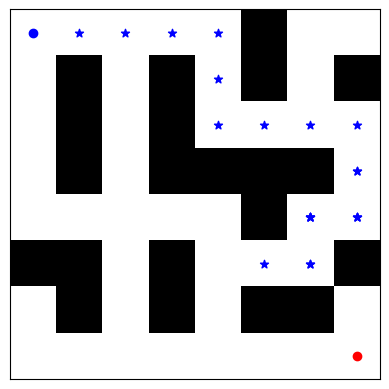

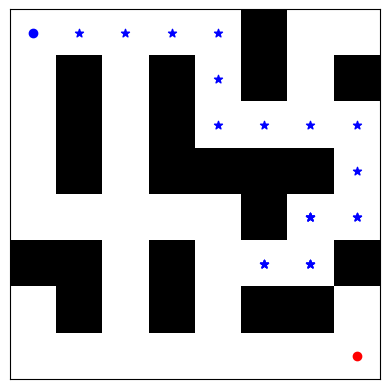

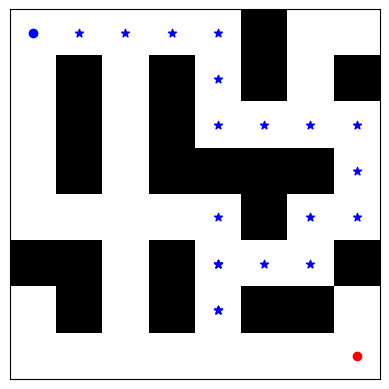

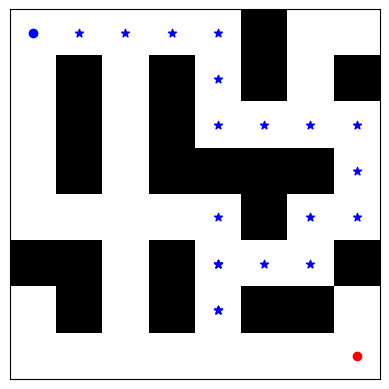

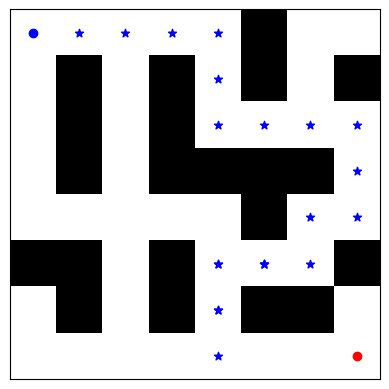

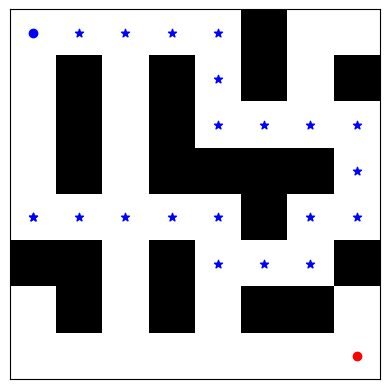

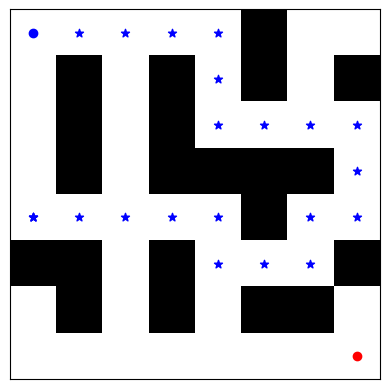

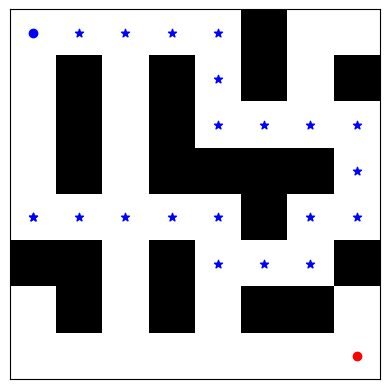

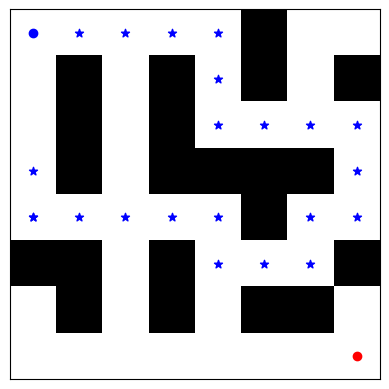

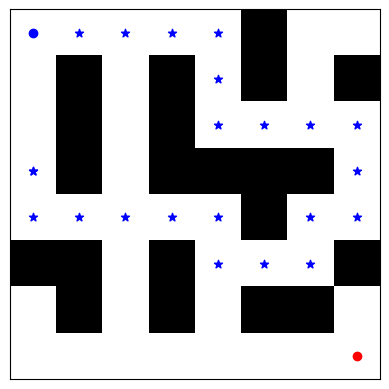

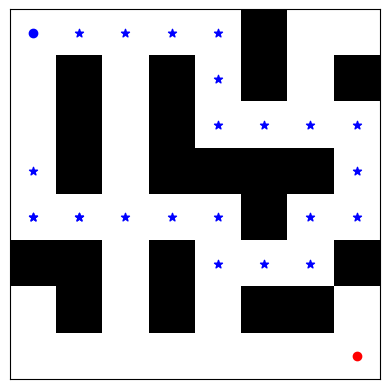

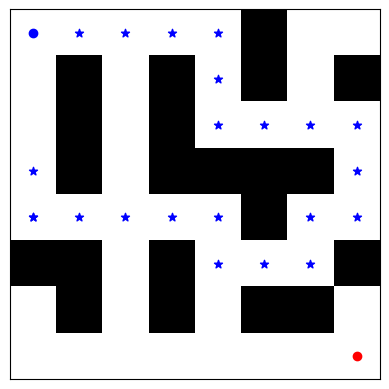

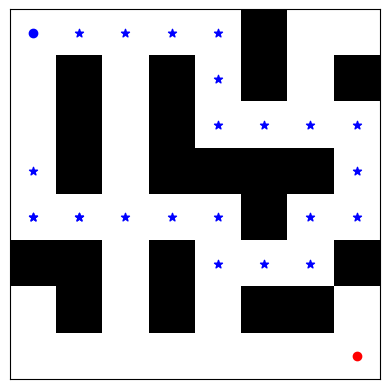

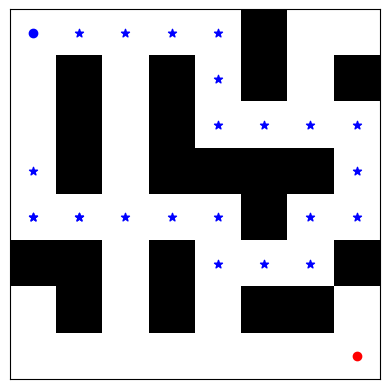

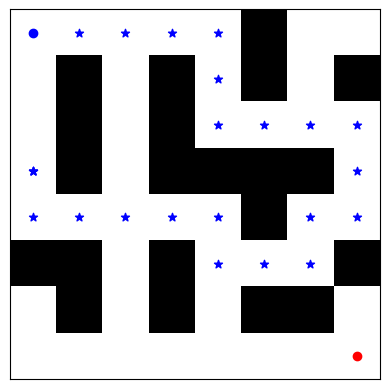

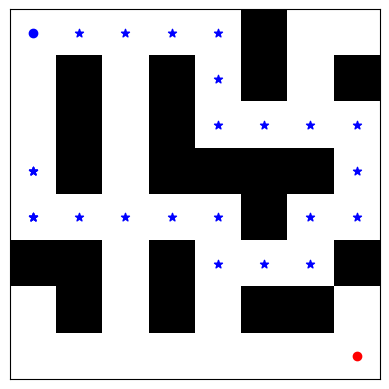

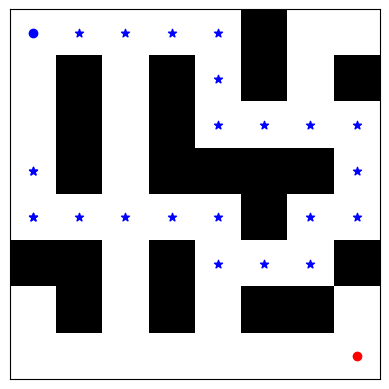

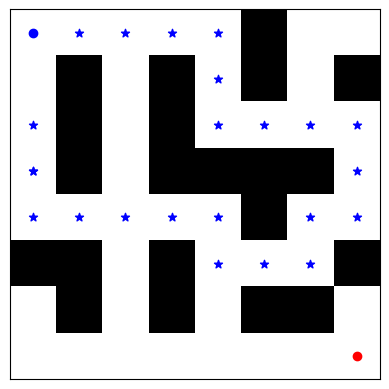

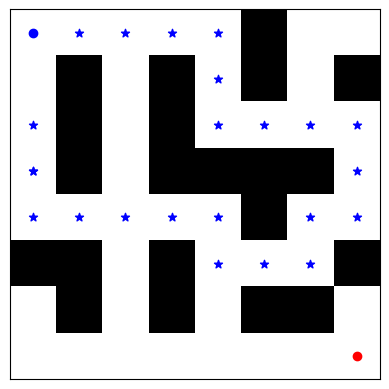

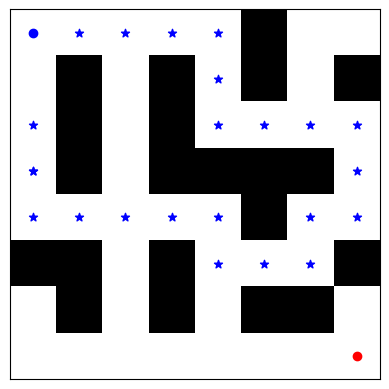

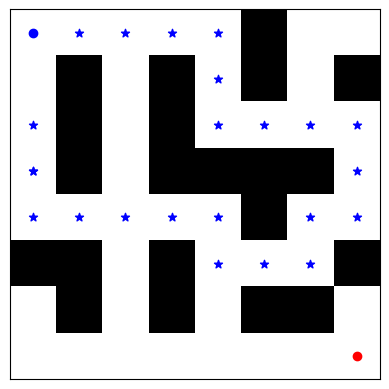

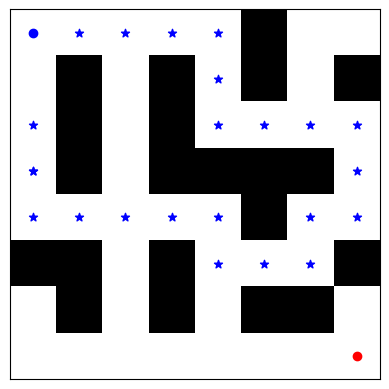

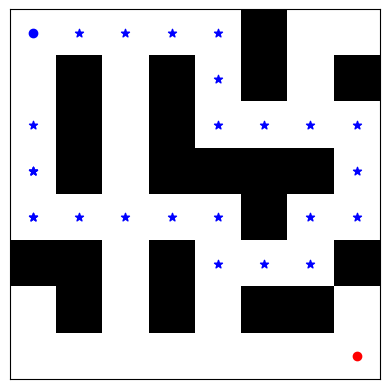

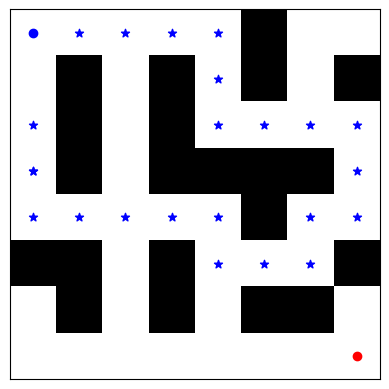

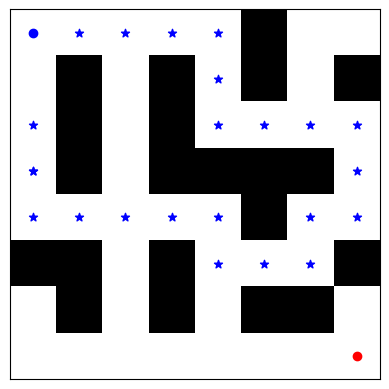

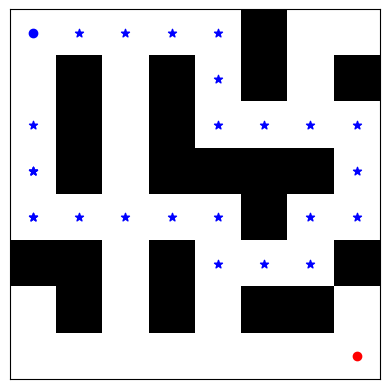

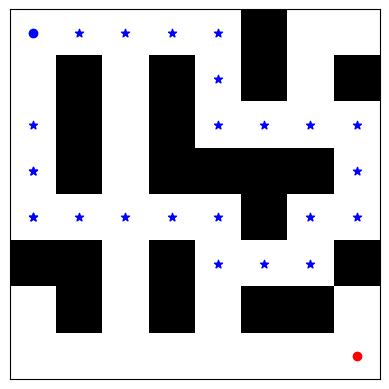

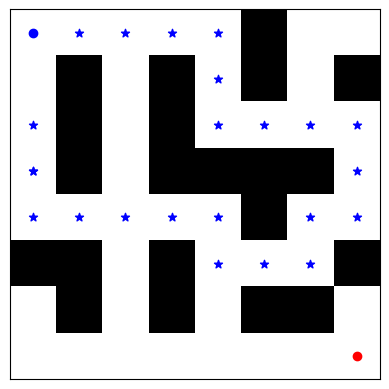

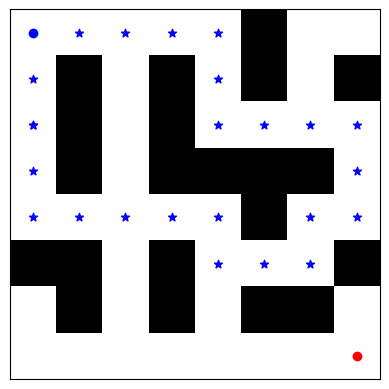

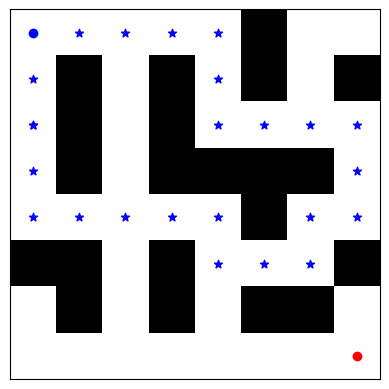

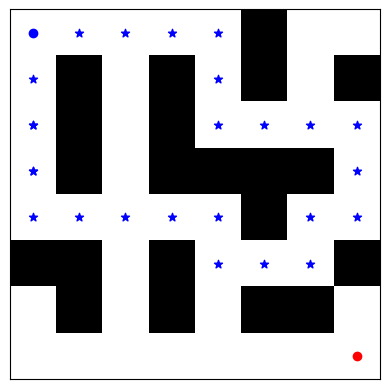

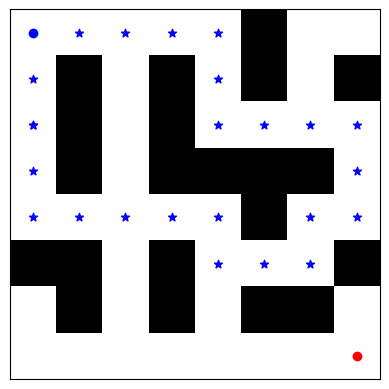

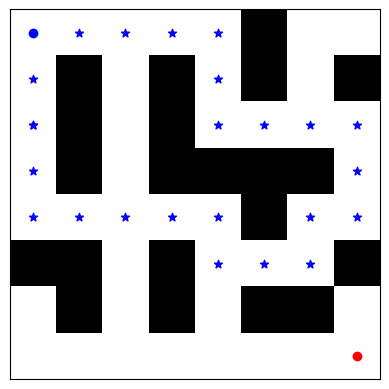

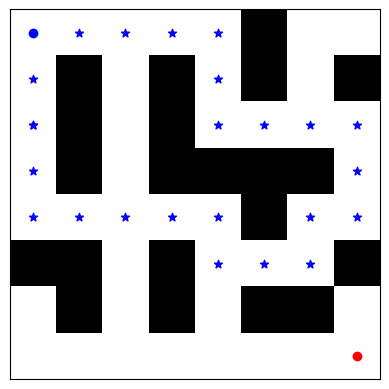

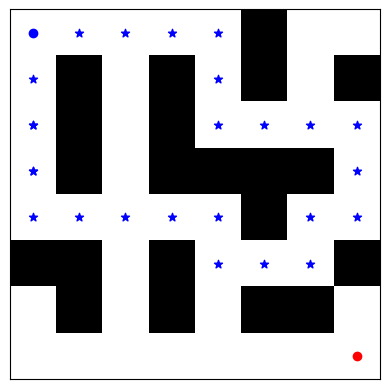

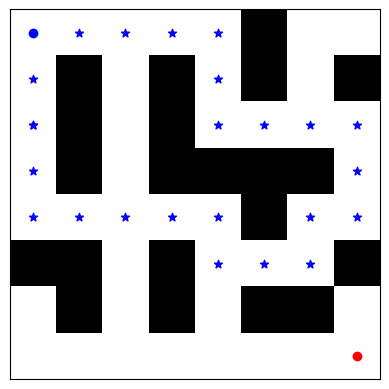

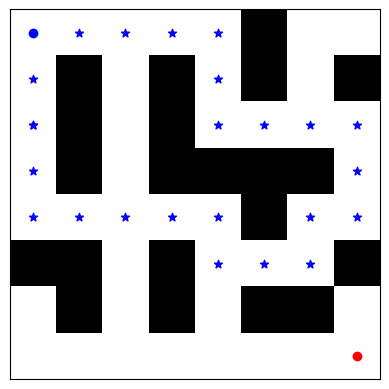

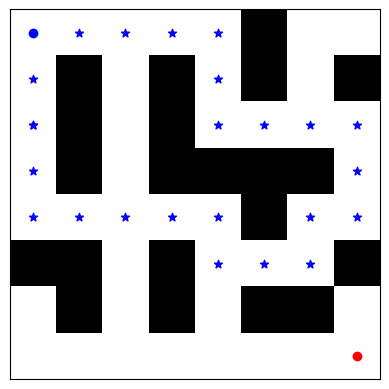

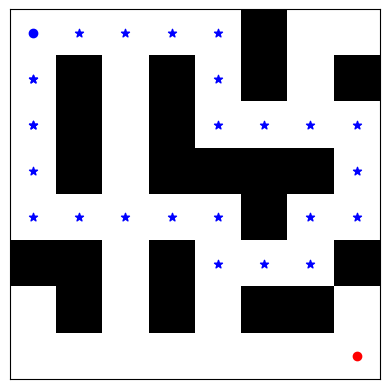

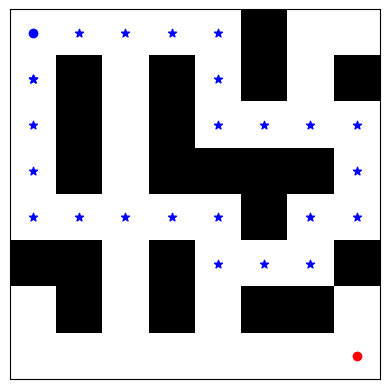

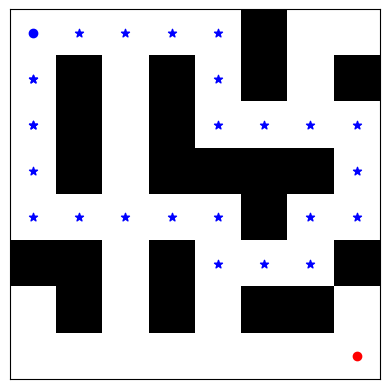

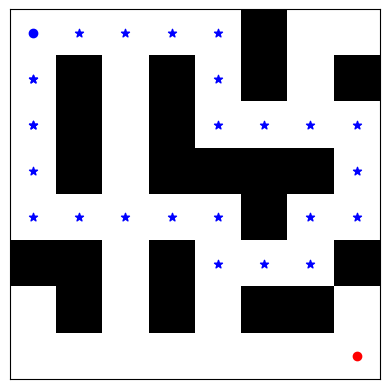

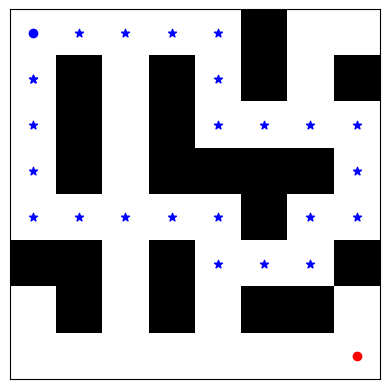

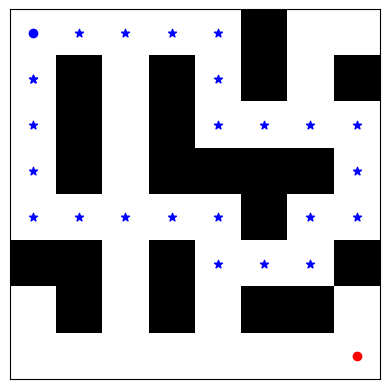

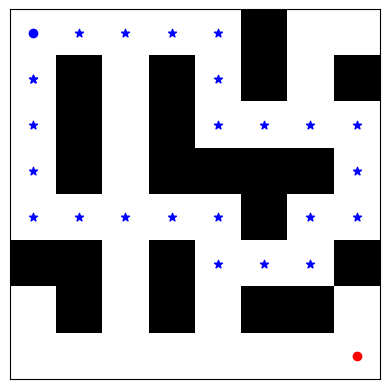

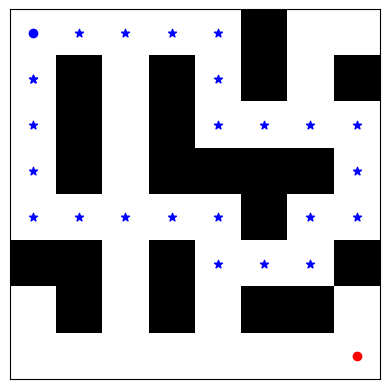

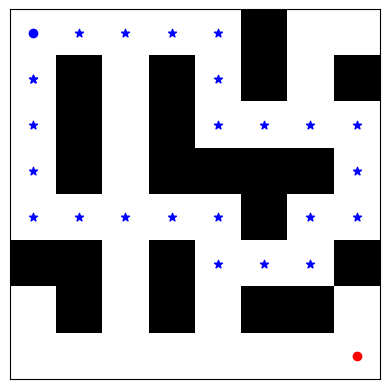

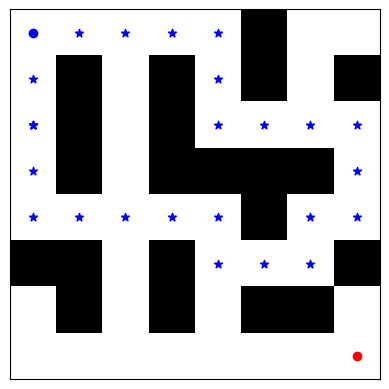

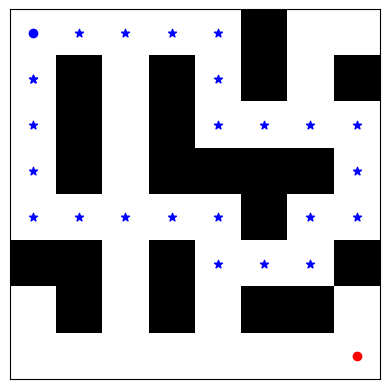

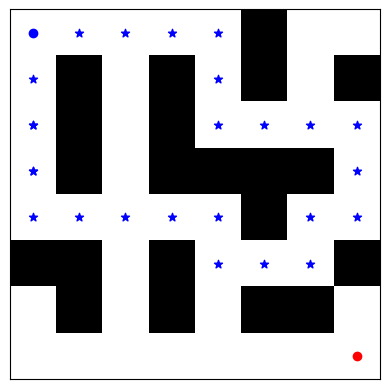

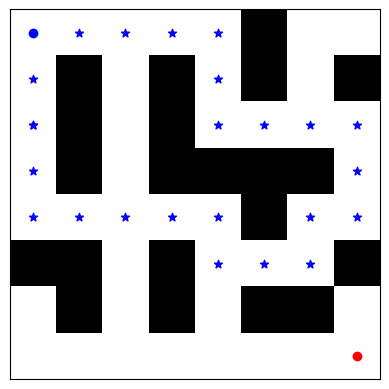

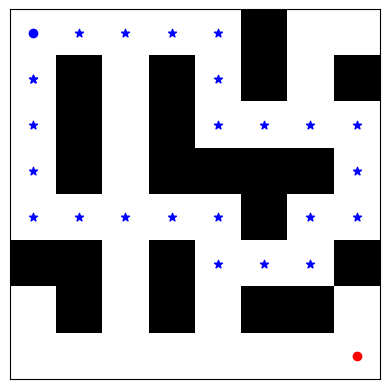

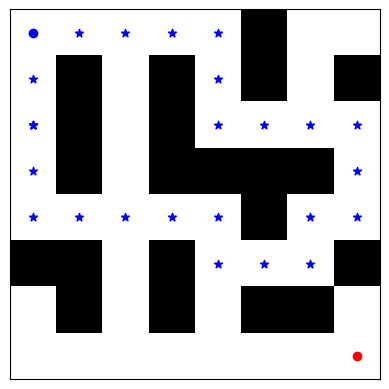

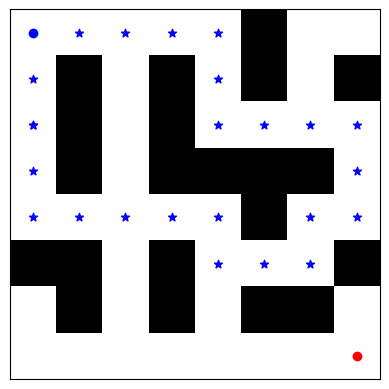

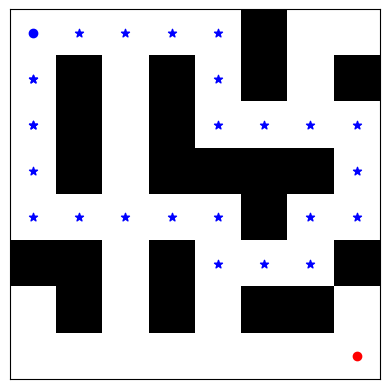

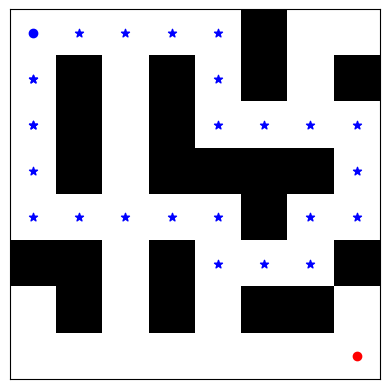

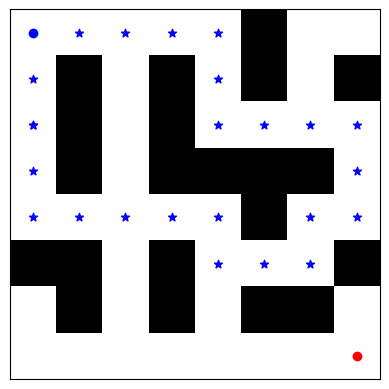

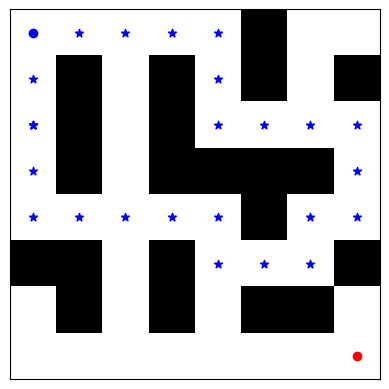

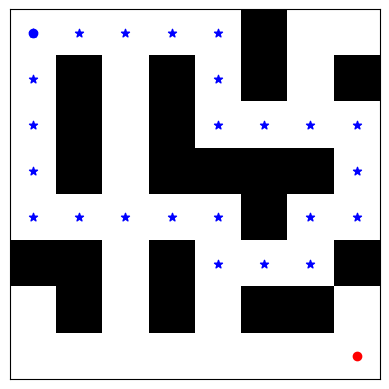

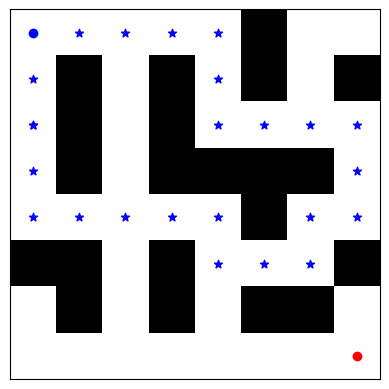

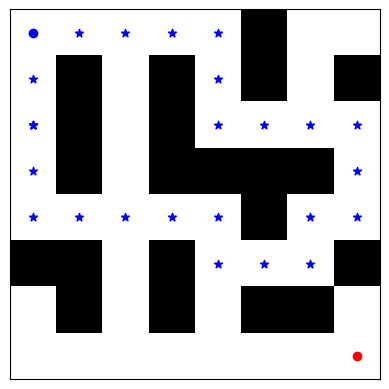

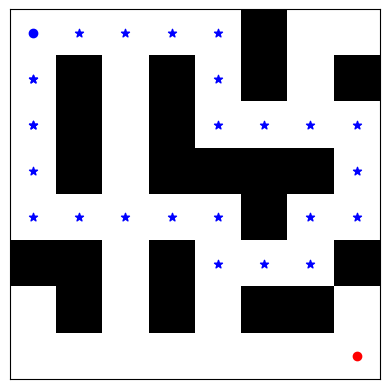

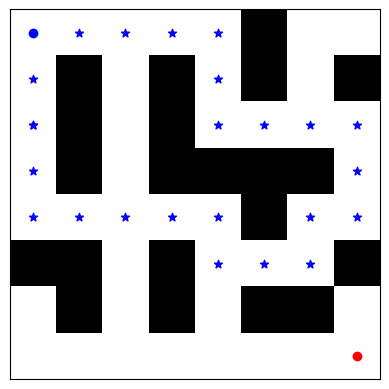

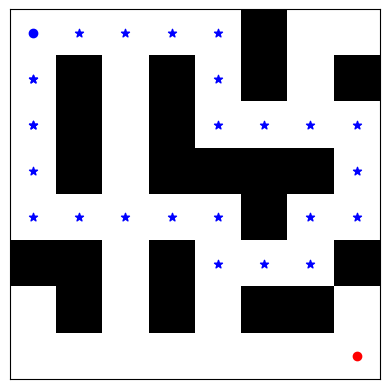

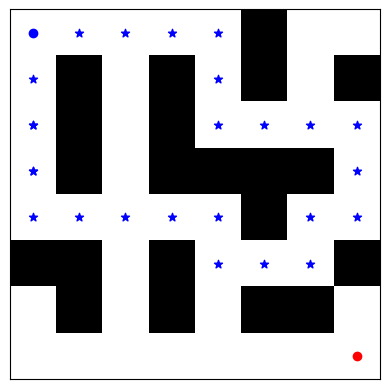

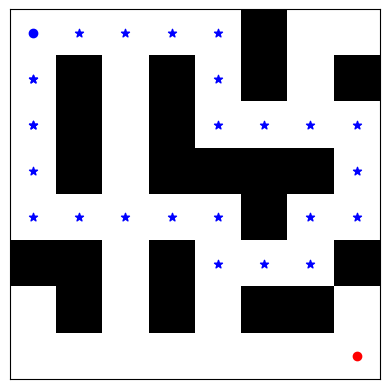

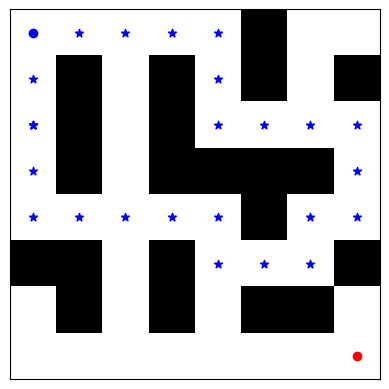

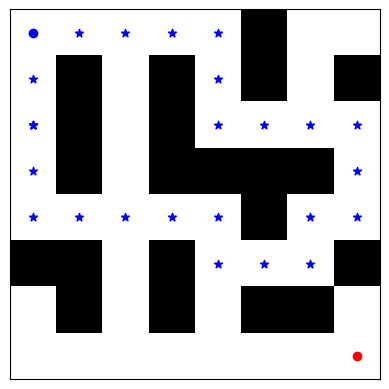

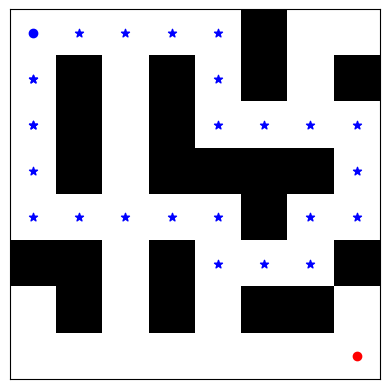

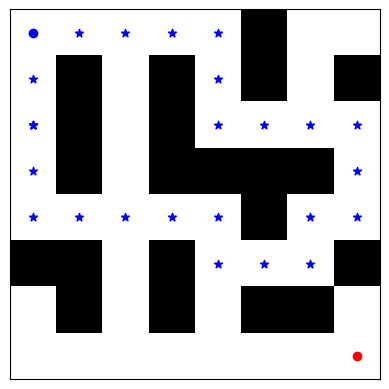

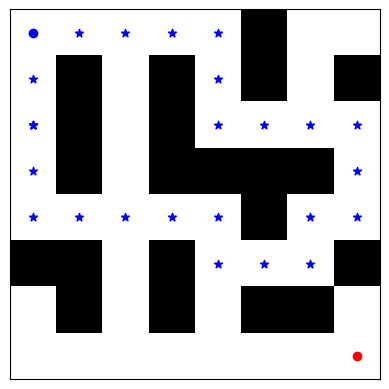

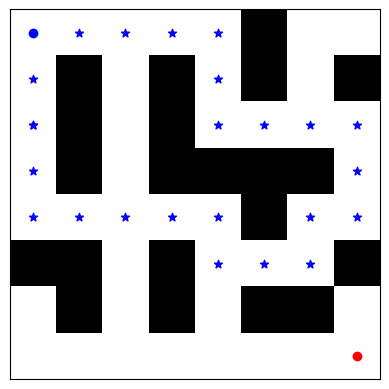

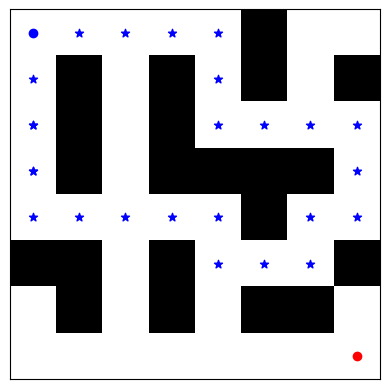

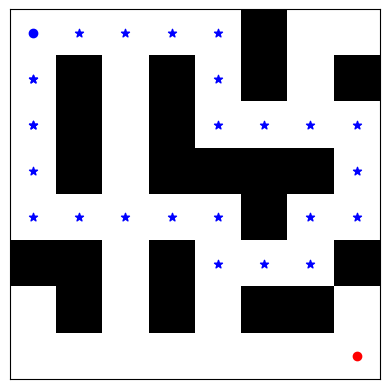

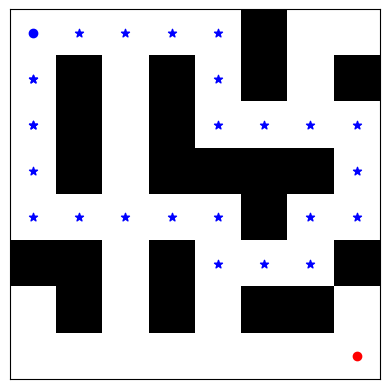

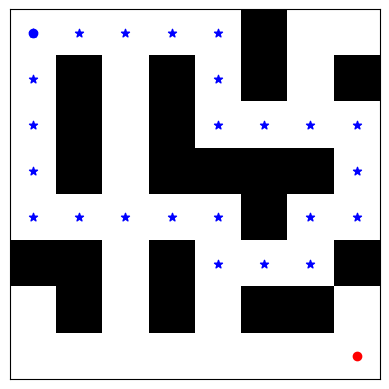

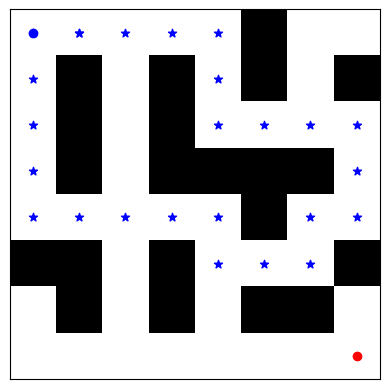

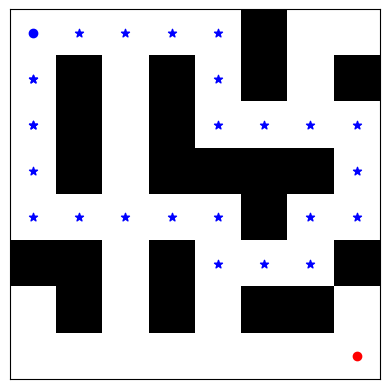

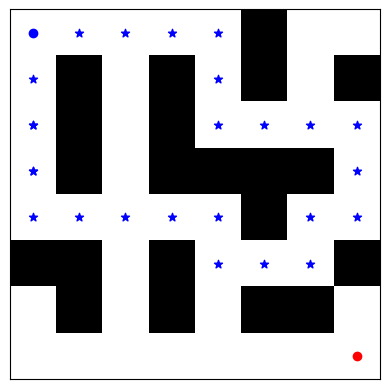

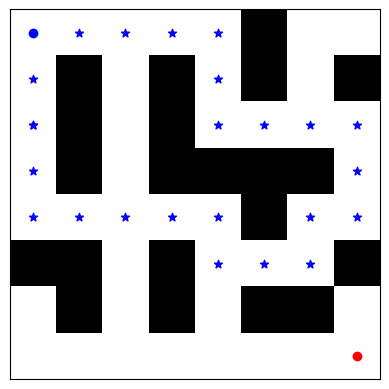

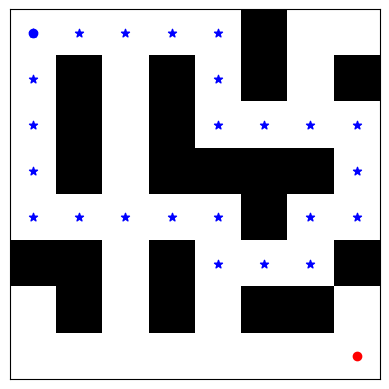

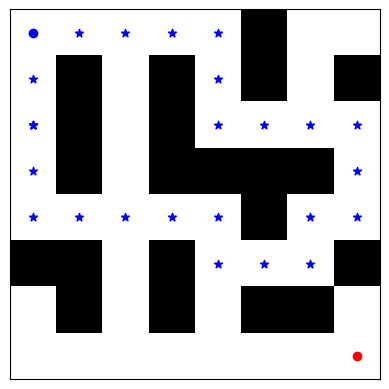

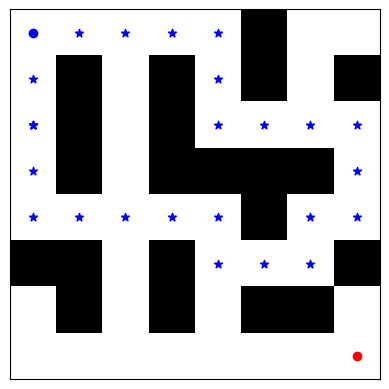

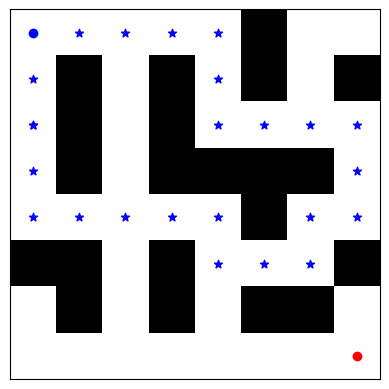

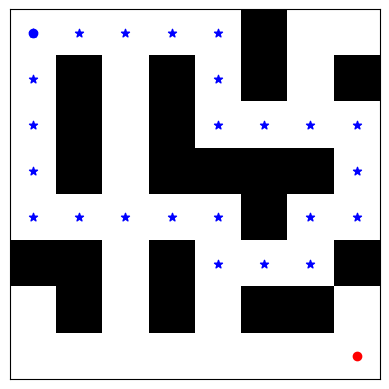

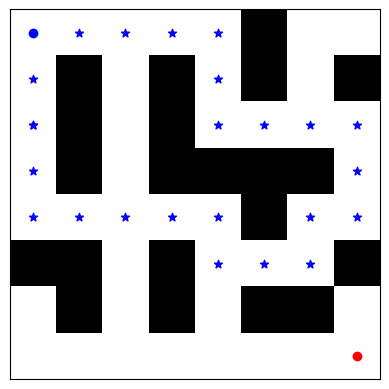

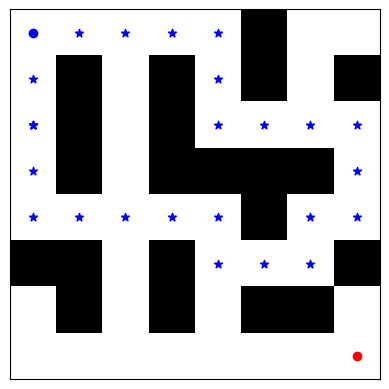

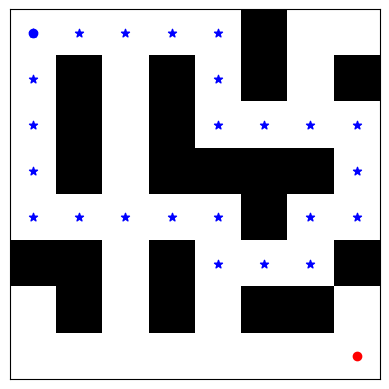

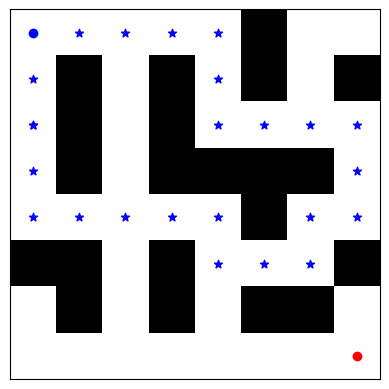

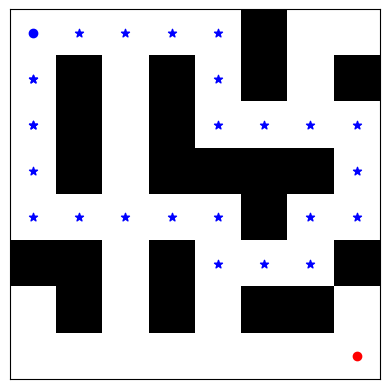

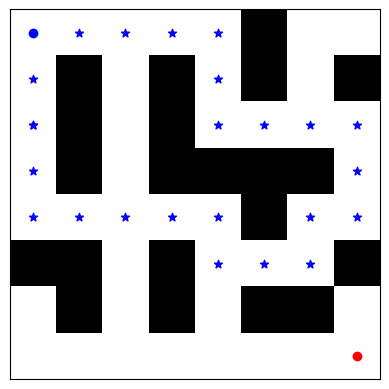

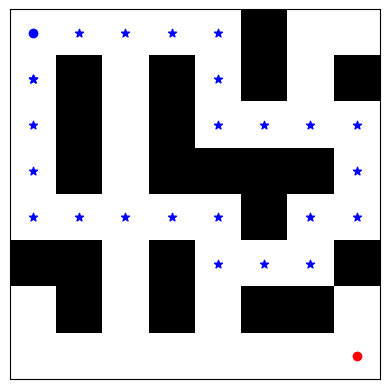

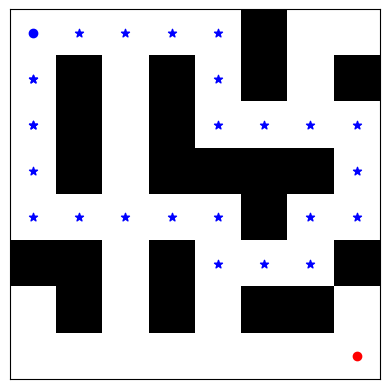

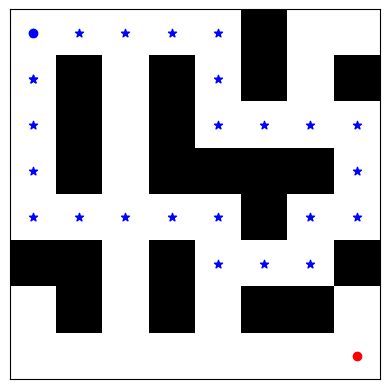

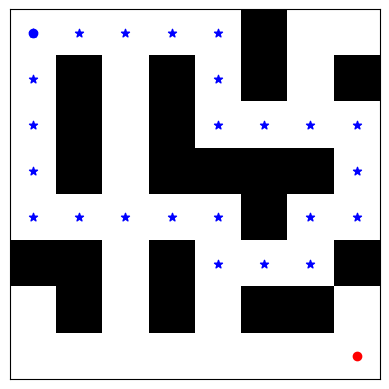

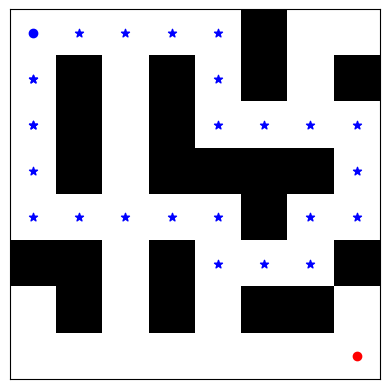

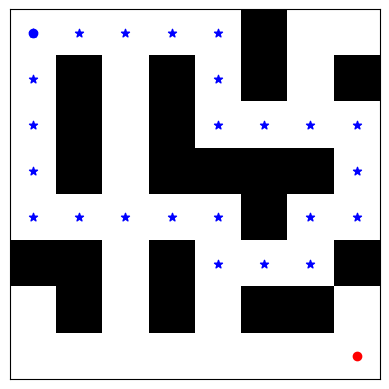

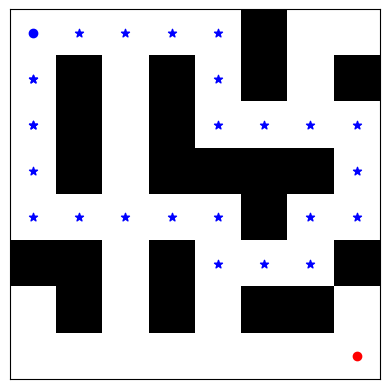

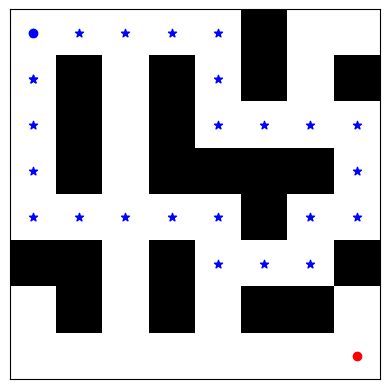

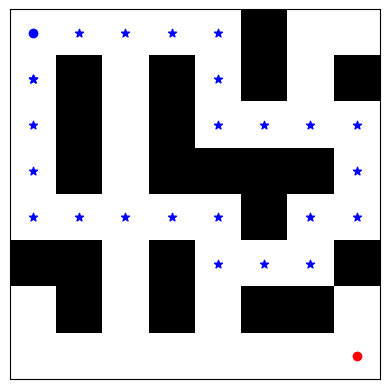

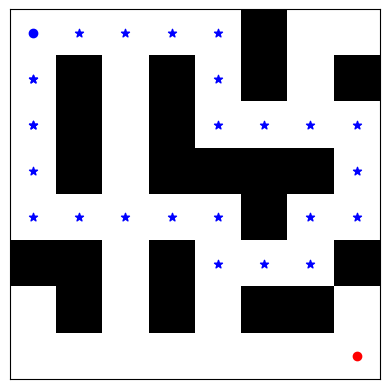

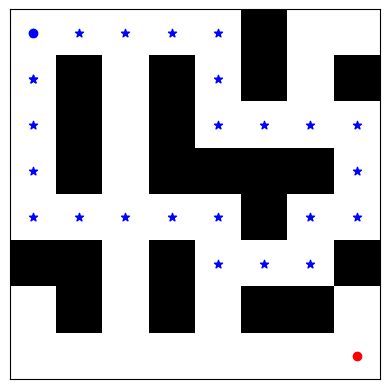

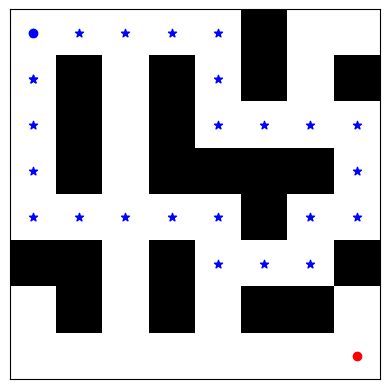

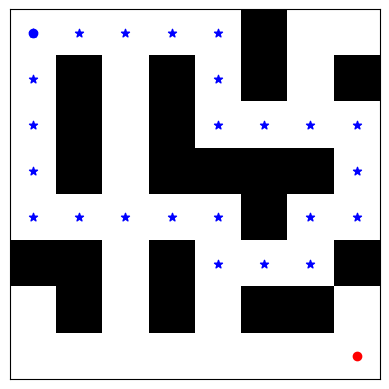

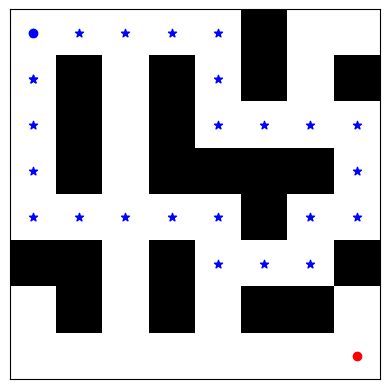

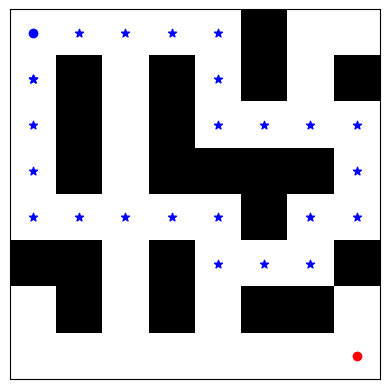

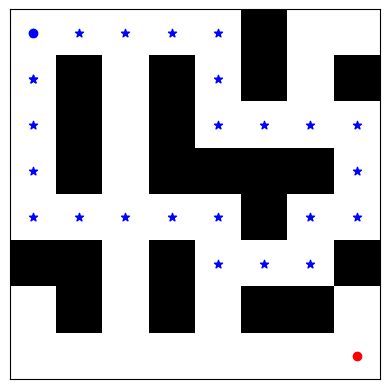

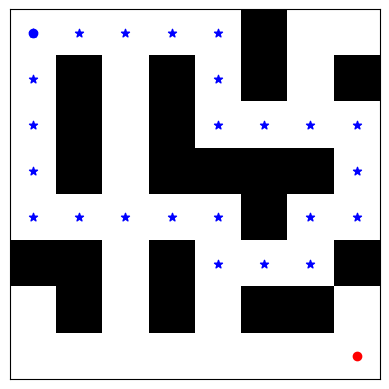

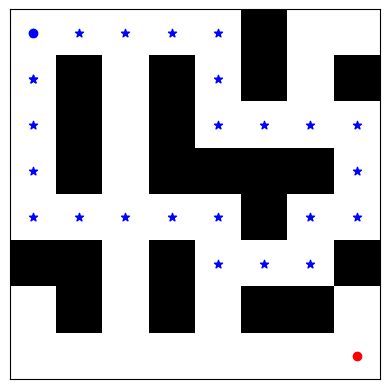

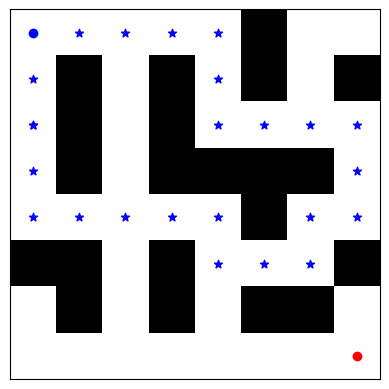

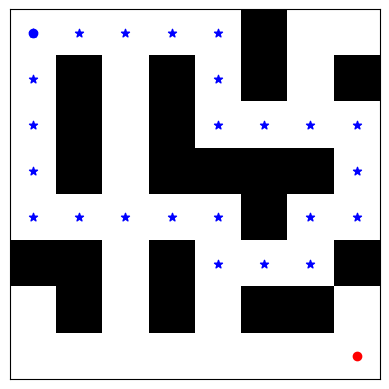

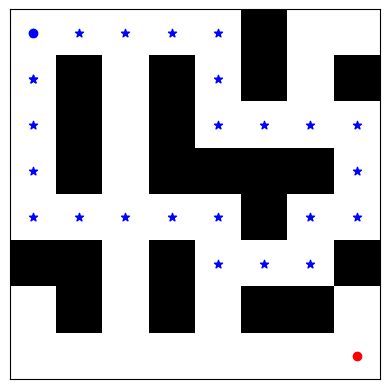

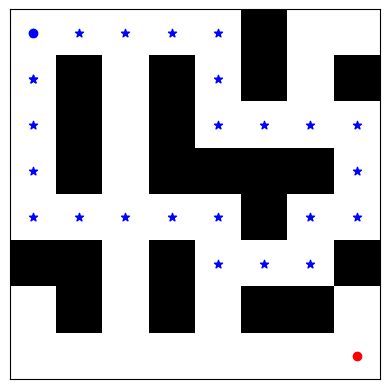

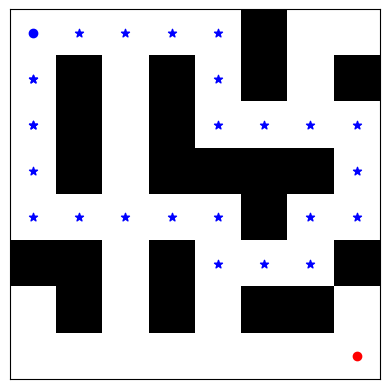

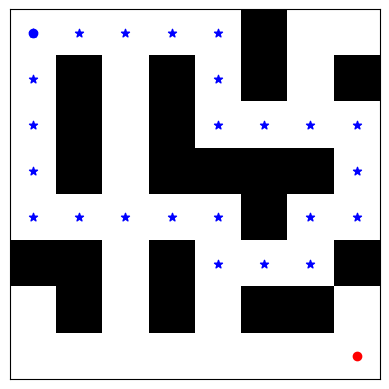

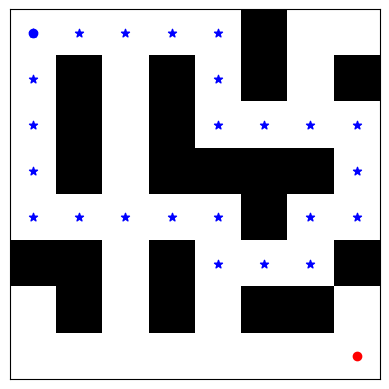

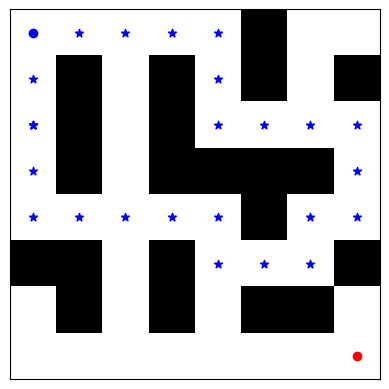

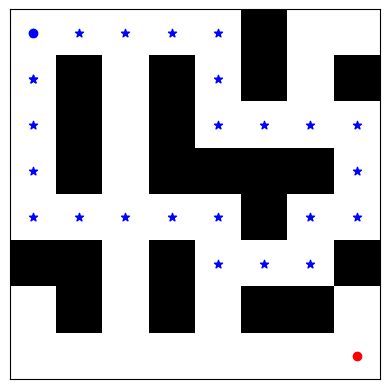

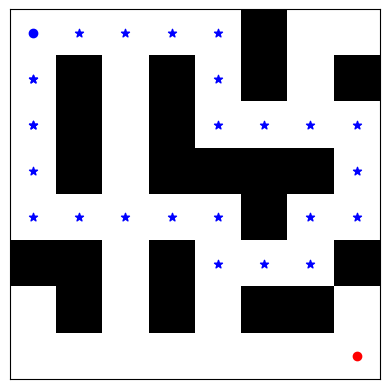

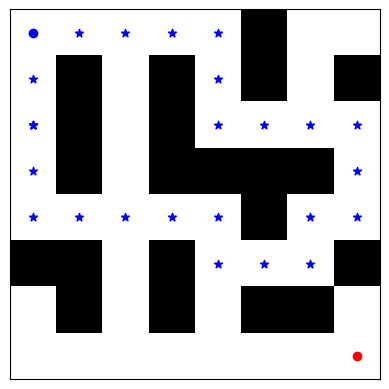

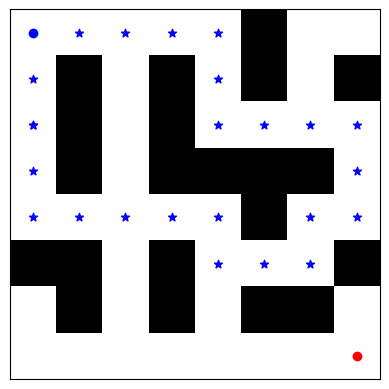

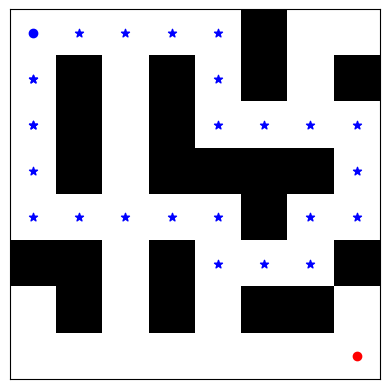

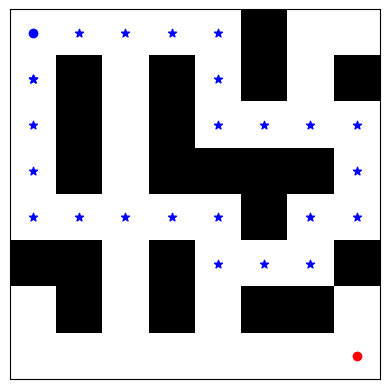

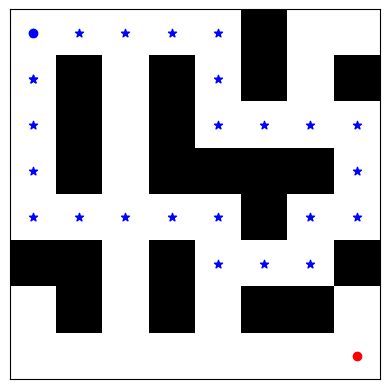

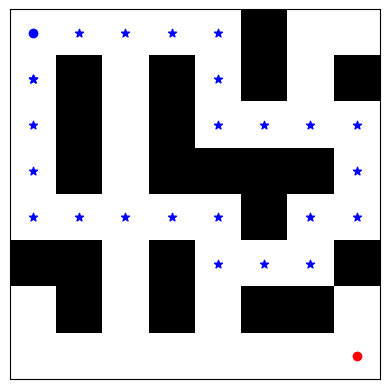

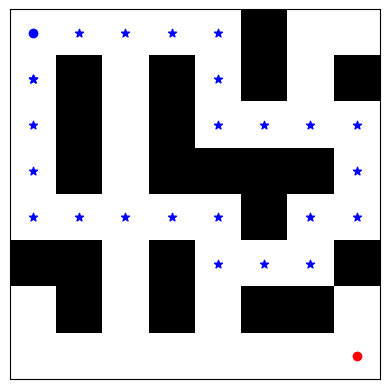

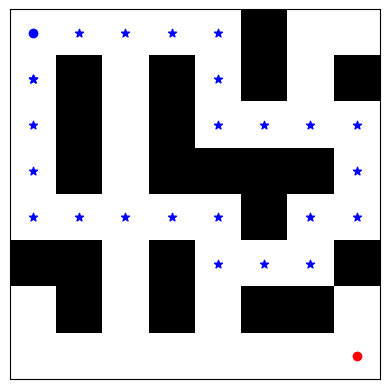

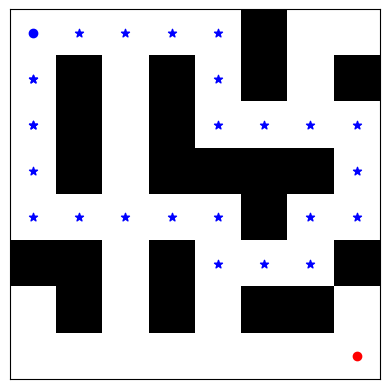

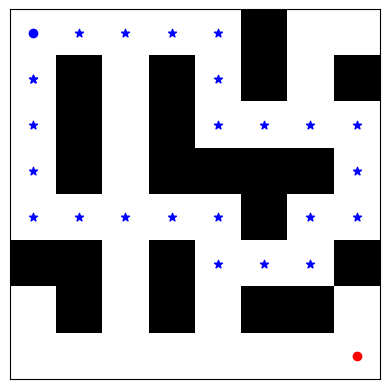

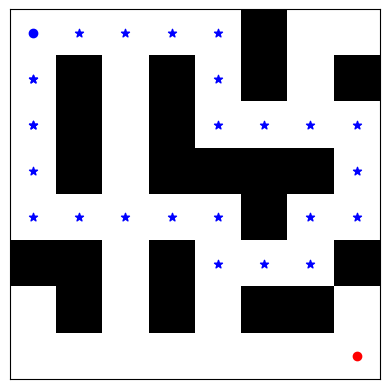

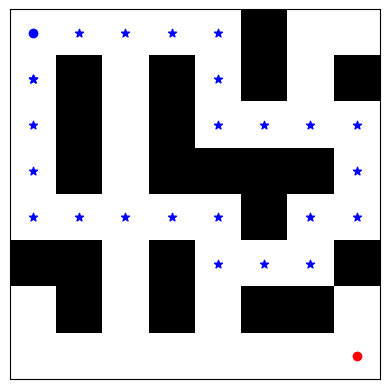

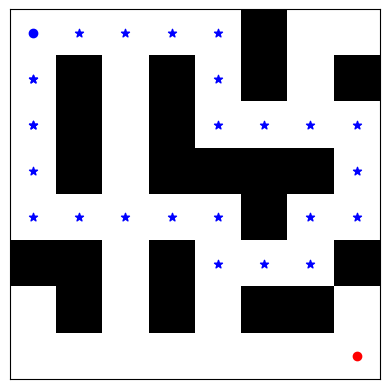

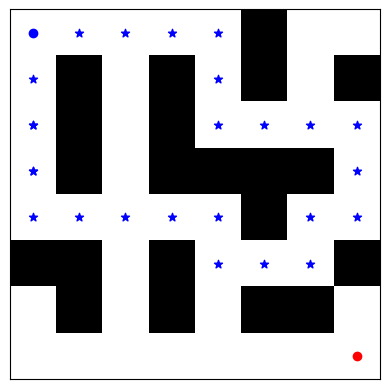

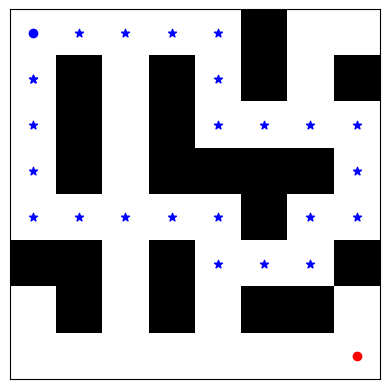

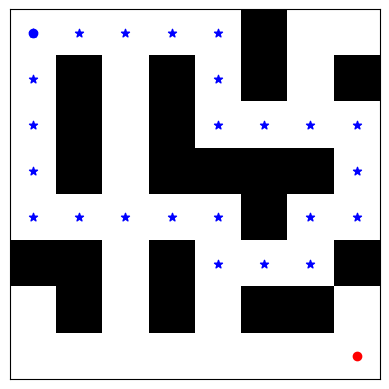

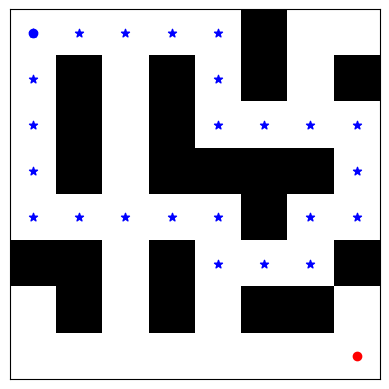

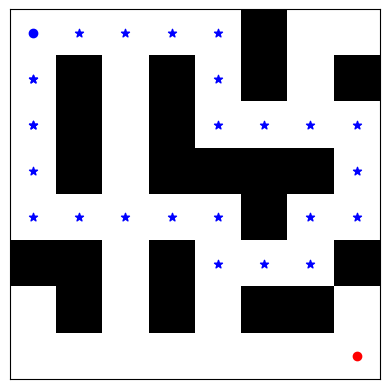

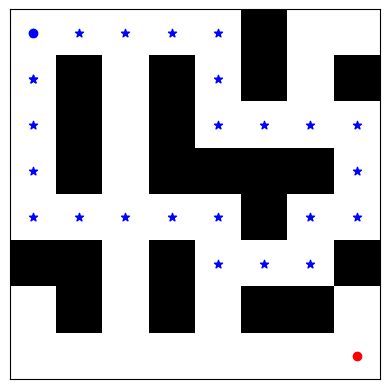

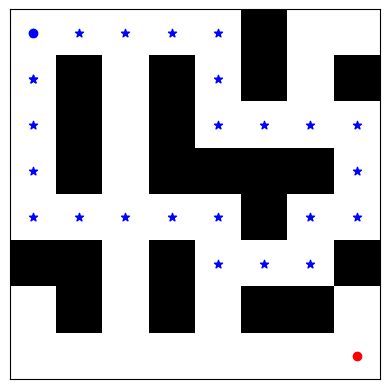

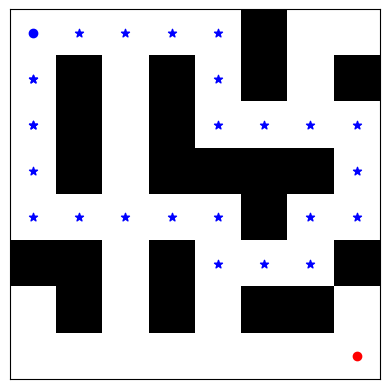

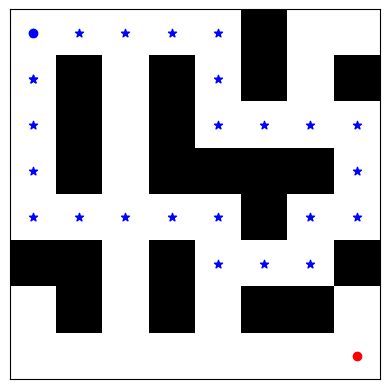

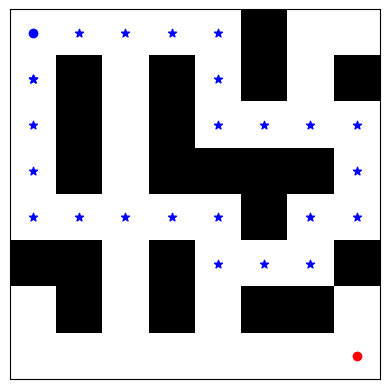

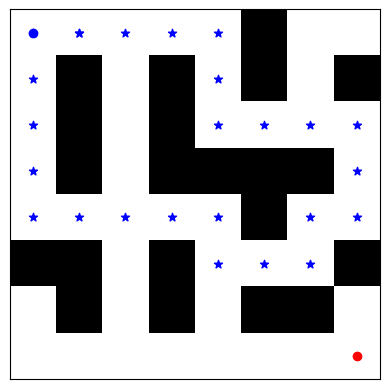

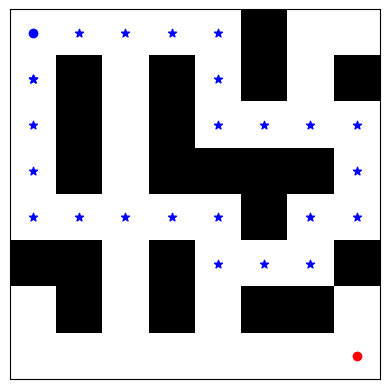

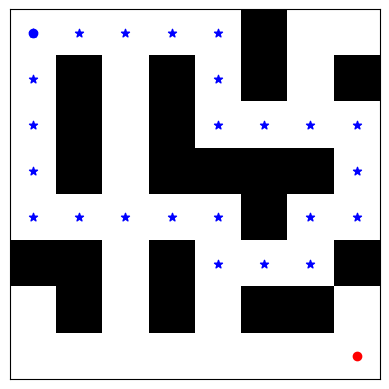

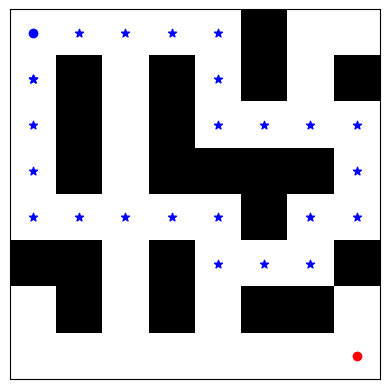

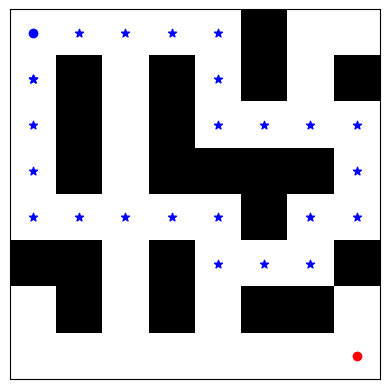

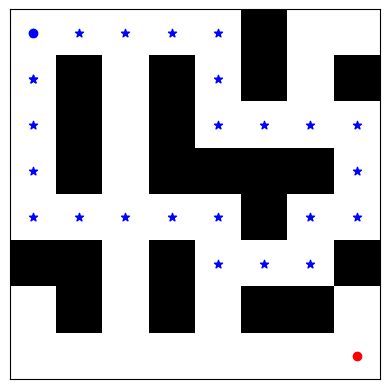

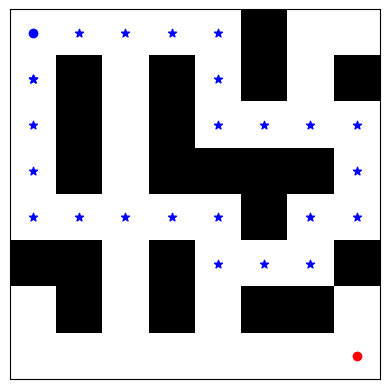

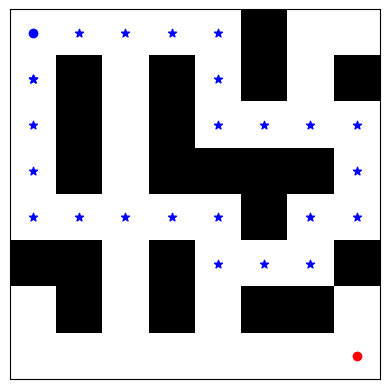

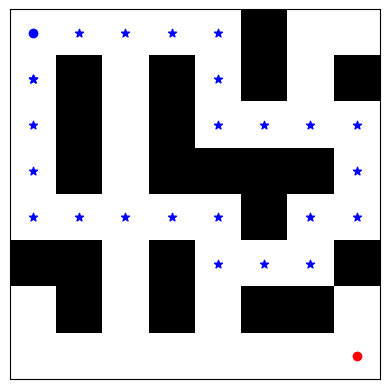

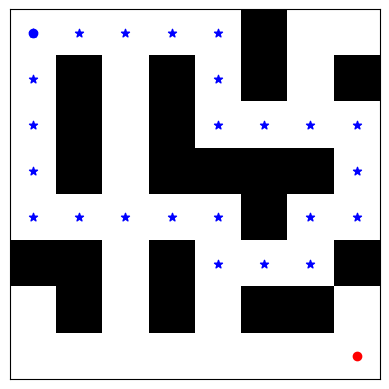

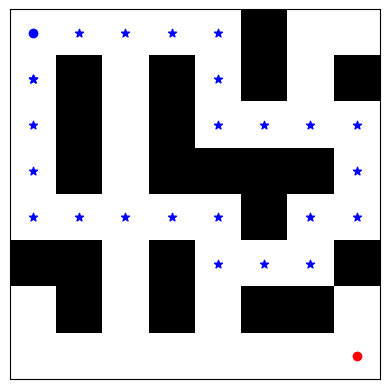

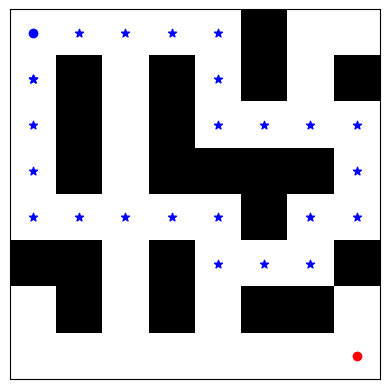

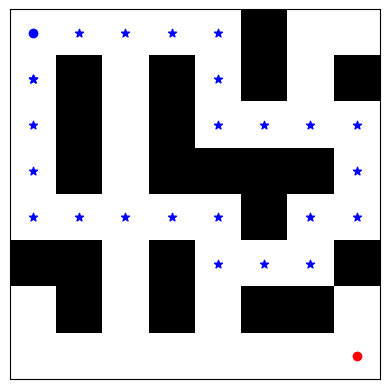

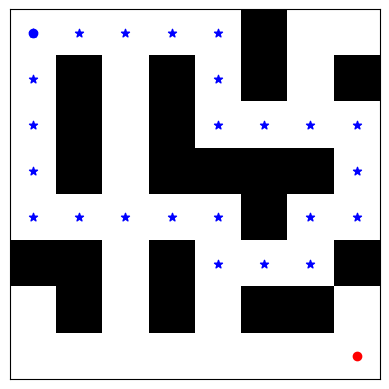

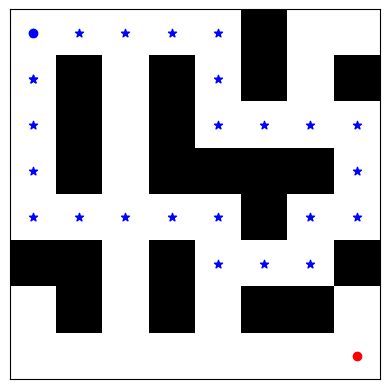

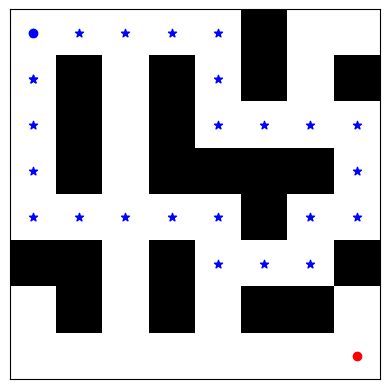

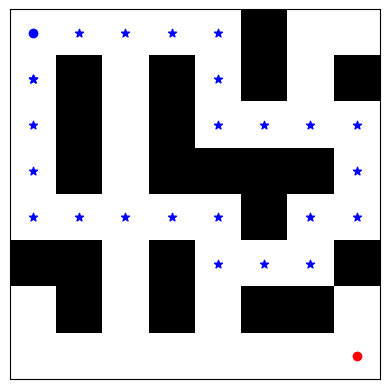

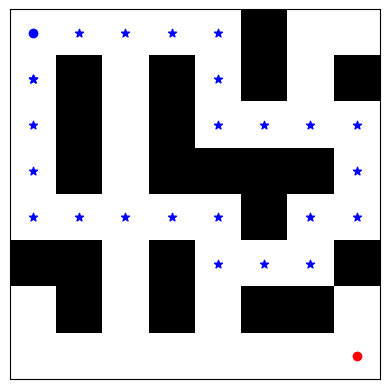

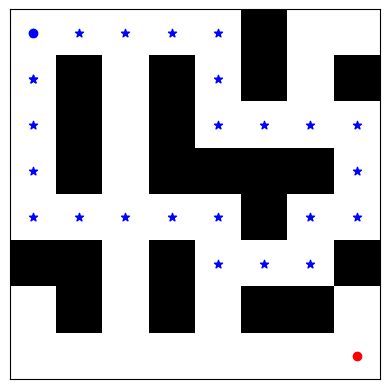

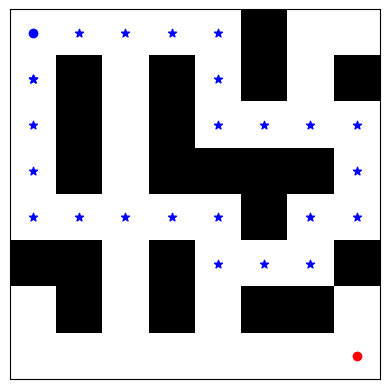

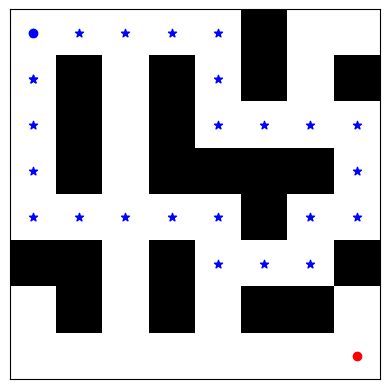

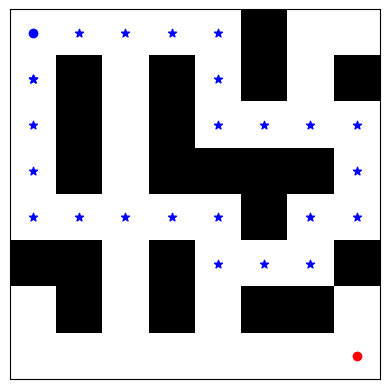

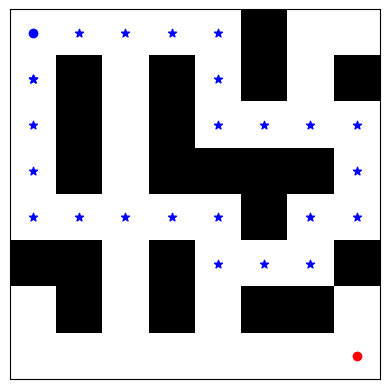

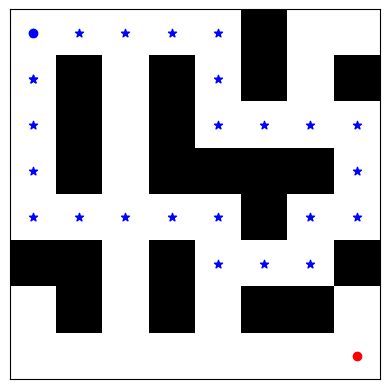

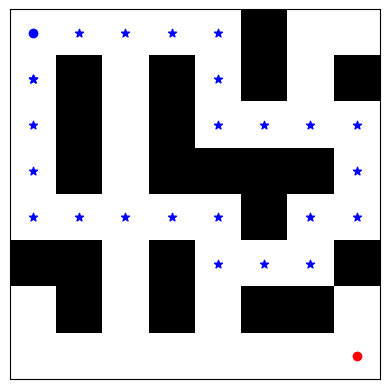

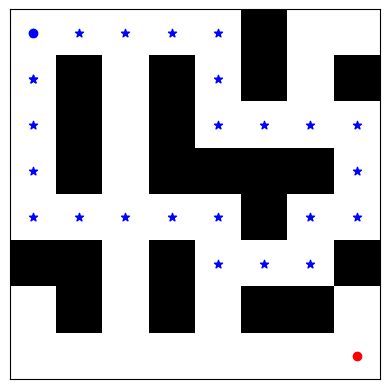

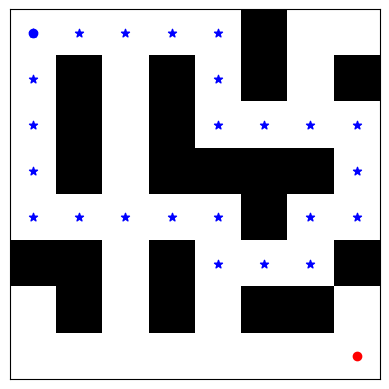

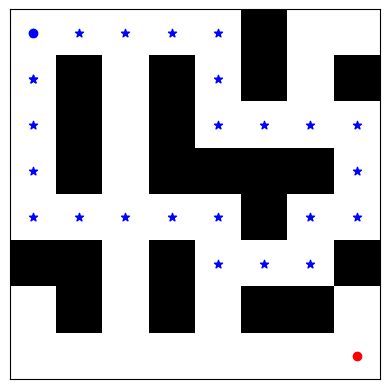

Best ice cube fitness: 23


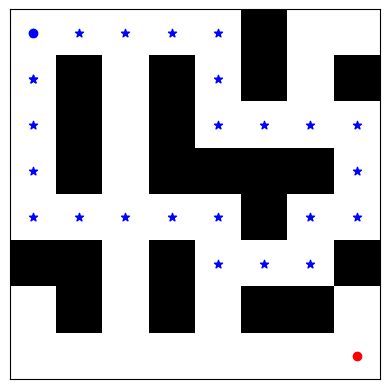

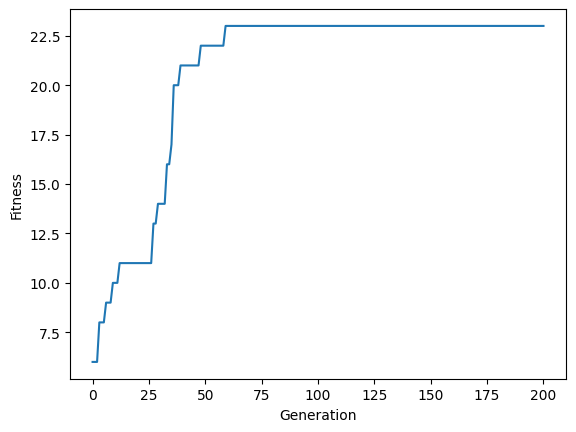

In [ ]:
# doesn't print on the blockages and found the path :)


import random
import numpy as np
import matplotlib.pyplot as plt

class IceCube:
    def __init__(self, num_moves):
        self.num_moves = num_moves
        self.path = ''.join(random.choice(['U', 'D', 'L', 'R']) for _ in range(num_moves))
        self.fitness = None

    def evaluate_fitness(self, maze):
        self.fitness = 0
        x, y = 0, 0
        goal_x, goal_y = maze.shape[0] - 1, maze.shape[1] - 1

        if maze[x][y] == 1:
            return

        visited = set()
        visited.add((x, y))

        for direction in self.path:
            if direction == 'U':
                x -= 1
            elif direction == 'D':
                x += 1
            elif direction == 'L':
                y -= 1
            elif direction == 'R':
                y += 1

            if x < 0 or x >= maze.shape[0] or y < 0 or y >= maze.shape[1]:
                return

            if (x, y) in visited:
                return

            visited.add((x, y))

            if maze[x][y] == 1:
                self.fitness -= 5

            self.fitness += 1

            if (x, y) == (0, 0) or (x, y) == (0, maze.shape[1] - 1) or (x, y) == (maze.shape[0] - 1, 0):
              self.fitness -= 10

        distance_to_goal = abs(x - goal_x) + abs(y - goal_y)
        self.fitness -= distance_to_goal

    def move(self, maze):
      x, y = 0, 0
      for direction in self.path:
          if direction == 'U':
              if x > 0 and maze[x-1][y] != 1:
                  x -= 1
          elif direction == 'D':
              if x < maze.shape[0]-1 and maze[x+1][y] != 1:
                  x += 1
          elif direction == 'L':
              if y > 0 and maze[x][y-1] != 1:
                  y -= 1
          elif direction == 'R':
              if y < maze.shape[1]-1 and maze[x][y+1] != 1:
                  y += 1
          if maze[x][y] == 1:
              return -1, -1
      return x, y

def visualize_maze(maze, ice_cube=None, save_path=None):
    # Visualize the maze with optional IceCube path
    cmap = plt.cm.binary
    cmap.set_bad(color='red')
    plt.imshow(maze, cmap=cmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    x, y = 0, 0
    plt.scatter(x, y, c='blue', marker='o')  # Starting position

    if ice_cube is not None:
        for direction in ice_cube.path:
            if direction == 'U' and x > 0 and maze[x - 1][y] != 1:
                x -= 1
            elif direction == 'D' and x < maze.shape[0] - 1 and maze[x + 1][y] != 1:
                x += 1
            elif direction == 'L' and y > 0 and maze[x][y - 1] != 1:
                y -= 1
            elif direction == 'R' and y < maze.shape[1] - 1 and maze[x][y + 1] != 1:
                y += 1

            plt.scatter(y, x, c='blue', marker='*')

    x_goal, y_goal = maze.shape[0] - 1, maze.shape[1] - 1
    plt.scatter(y_goal, x_goal, c='red', marker='o')  # Goal position

    if save_path is not None:
        plt.savefig(save_path)
    plt.show()



POPULATION_SIZE = 200
MUTATION_RATE = 0.5
NUM_GENERATIONS = 200

def generate_initial_population(size):
    population = []
    for i in range(size):
        path_length = random.randint(10, 50)
        ice_cube = IceCube(path_length)
        ice_cube.evaluate_fitness(maze)
        population.append(ice_cube)
    return population

def select_parents(population):
    parent1 = max(random.sample(population, k=5), key=lambda ice_cube: ice_cube.fitness)
    parent2 = max(random.sample(population, k=5), key=lambda ice_cube: ice_cube.fitness)
    return parent1, parent2

def crossover(parent1, parent2):
    child = IceCube(parent1.num_moves)

    # Randomly select two crossover points
    crossover_point1 = random.randint(0, parent1.num_moves - 1)
    crossover_point2 = random.randint(0, parent1.num_moves - 1)

    # Ensure crossover_point2 is greater than crossover_point1
    crossover_point1, crossover_point2 = min(crossover_point1, crossover_point2), max(crossover_point1, crossover_point2)

    # Inherit moves from parent1 between the crossover points
    child.path = parent1.path[:crossover_point1] + parent2.path[crossover_point1:crossover_point2] + parent1.path[crossover_point2:]

    return child


def mutate(ice_cube):
    mutation_index = random.randint(0, ice_cube.num_moves - 1)
    mutation_direction = random.choice(['U', 'D', 'L', 'R'])
    ice_cube.path = ice_cube.path[:mutation_index] + mutation_direction + ice_cube.path[mutation_index+1:]

def run_generation(population):
    new_population = []
    for i in range(len(population)):
        parent1, parent2 = select_parents(population)
        child = crossover(parent1, parent2)
        if random.random() < MUTATION_RATE:
            mutate(child)
        child.evaluate_fitness(maze)
        new_population.append(child)
    return new_population

def run_genetic_algorithm():
    population = generate_initial_population(POPULATION_SIZE)
    best_ice_cube = max(population, key=lambda ice_cube: ice_cube.fitness)
    fitness_history = [best_ice_cube.fitness]
    for i in range(NUM_GENERATIONS):
        population = run_generation(population)
        best_ice_cube = max(population, key=lambda ice_cube: ice_cube.fitness)
        fitness_history.append(best_ice_cube.fitness)

        visualize_maze(maze, ice_cube=best_ice_cube)

    return best_ice_cube, fitness_history

maze = np.array([[0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 1, 0, 1, 0, 1, 0, 1],
                 [0, 1, 0, 1, 0, 0, 0, 0],
                 [0, 1, 0, 1, 1, 1, 1, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0],
                 [1, 1, 0, 1, 0, 0, 0, 1],
                 [0, 1, 0, 1, 0, 1, 1, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0]])

best_ice_cube, fitness_history = run_genetic_algorithm()

print(f"Best ice cube fitness: {best_ice_cube.fitness}")
visualize_maze(maze, ice_cube=best_ice_cube)
plt.plot(fitness_history)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()